### Perisetla Sri Sai Yagnik

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('sales_data_with_discounts.csv')

In [6]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


#### Descriptive Analytics for Numerical Columns

In [12]:
num = df.select_dtypes(['float64','int64']).columns.tolist()
print("Numerical Columns: ",num)
cat = df.select_dtypes(['object']).columns.tolist()
print("Categorial Columns: ",cat)

Numerical Columns:  ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorial Columns:  ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [22]:
stats = pd.DataFrame({'Mean':df[num].mean(),'Median':df[num].median(),'Mode':df[num].mode().iloc[0],'Standard Deviation':df[num].std()})
print("Statistics:")
stats

Statistics:


,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


#### Data Visualization

##### Histogram

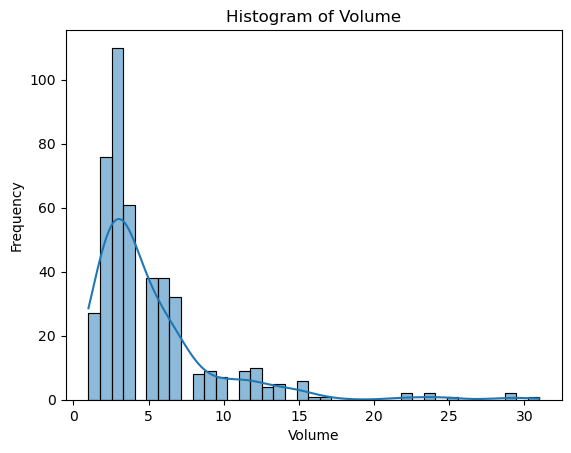

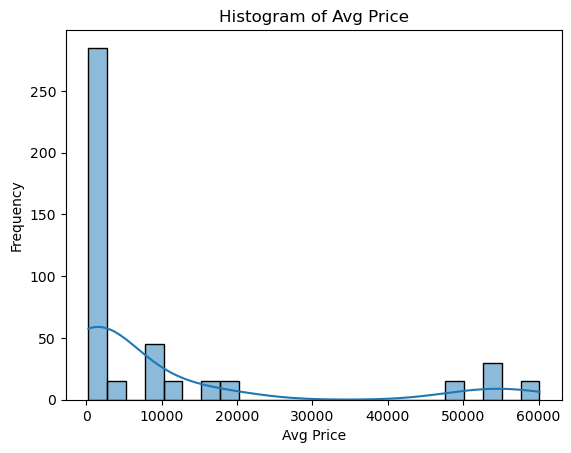

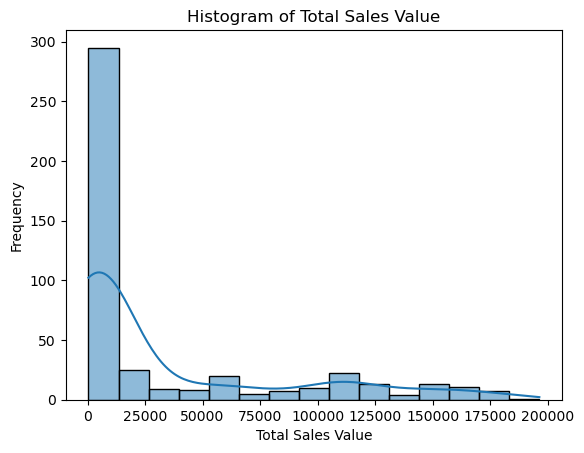

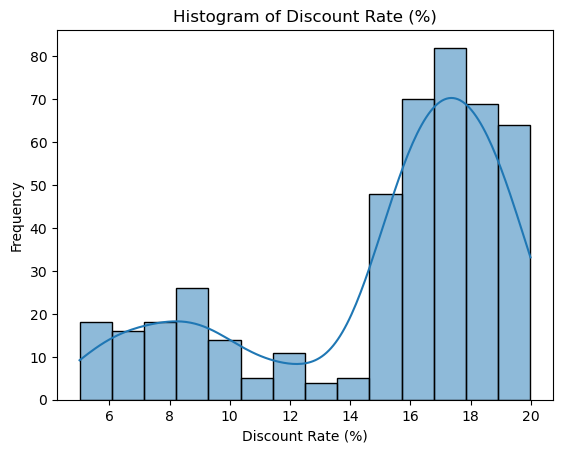

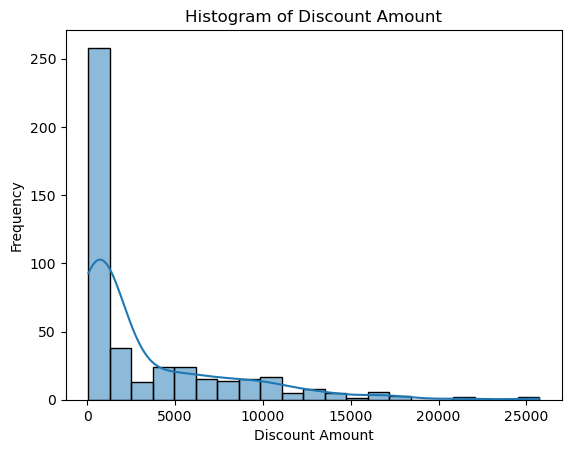

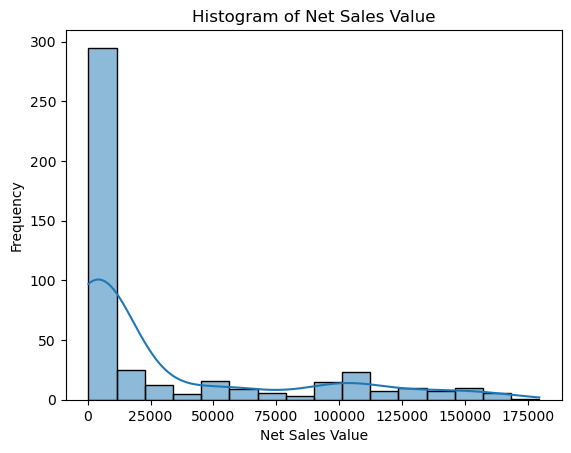

In [30]:
for col in num:
    sns.histplot(df[col],kde = 'True')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### Box Plot

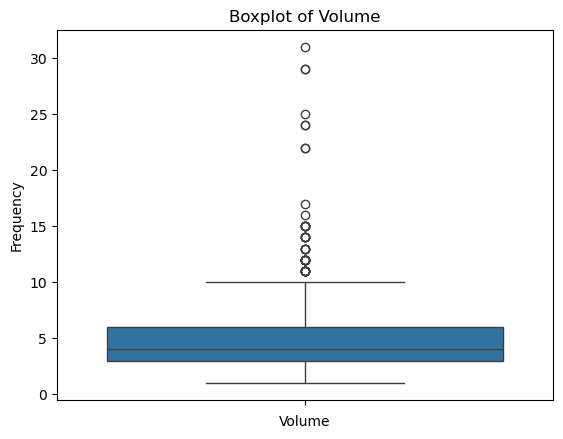

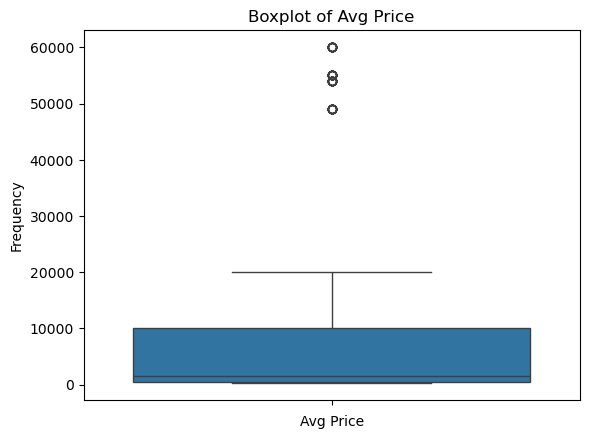

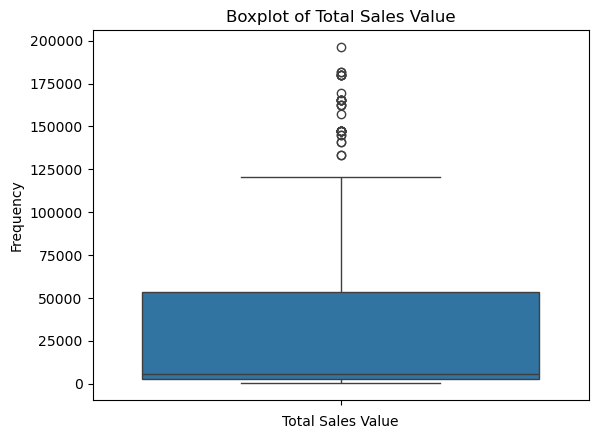

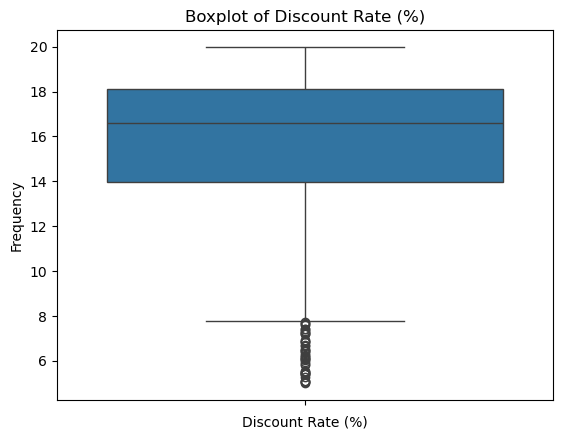

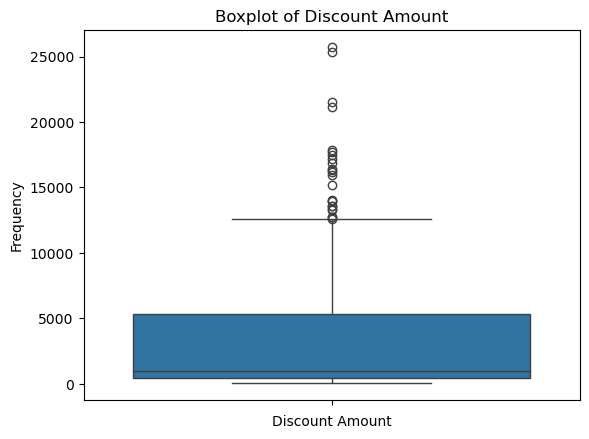

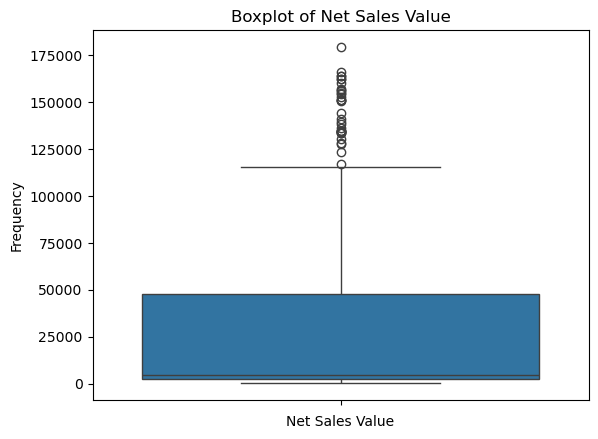

In [33]:
for col in num:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [36]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

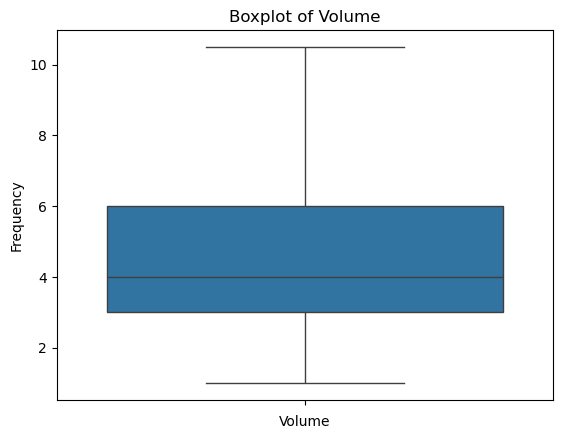

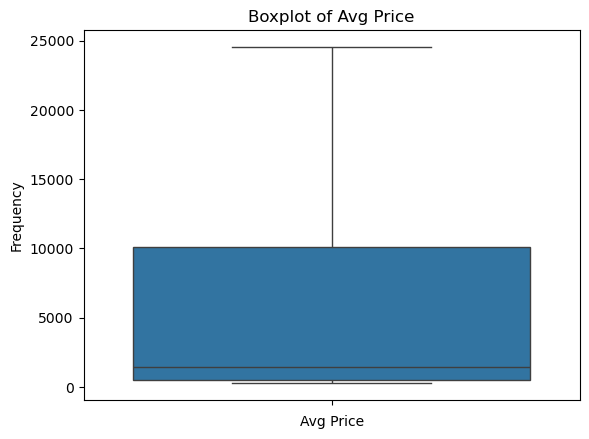

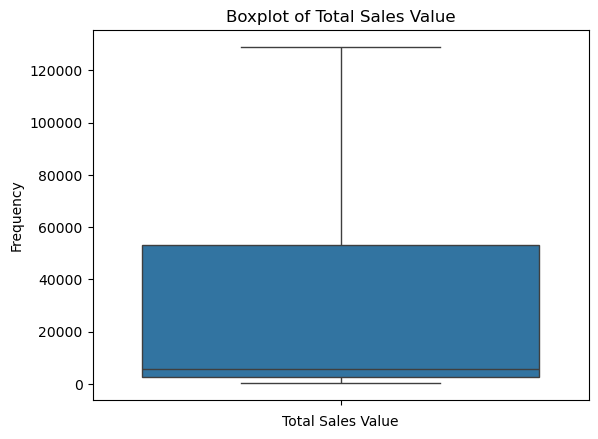

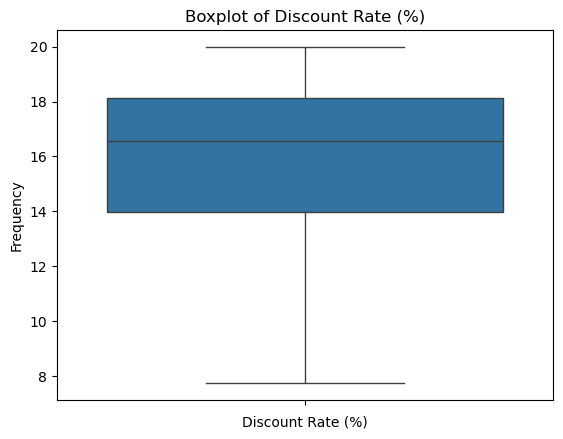

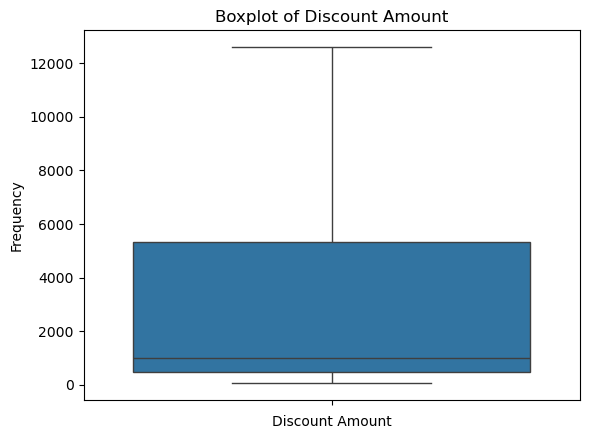

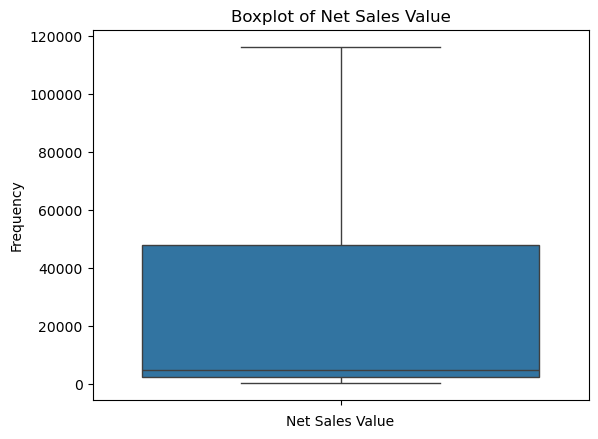

In [38]:
### After Removing outliers
for col in num:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

##### Bar Chart

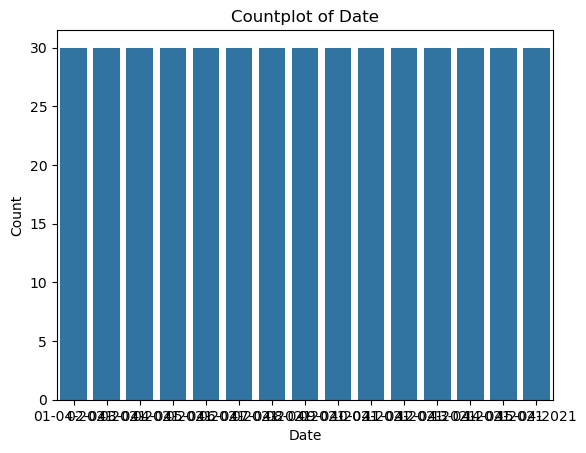

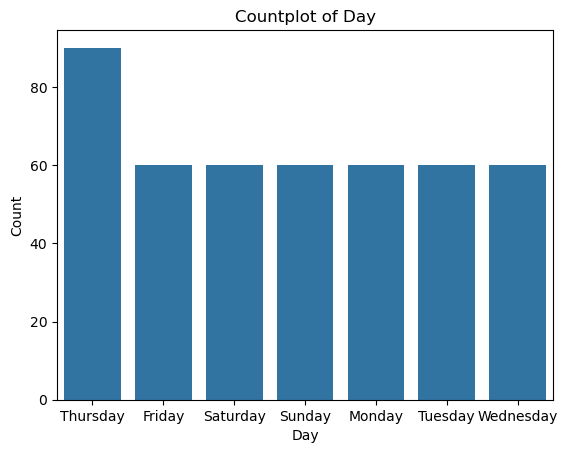

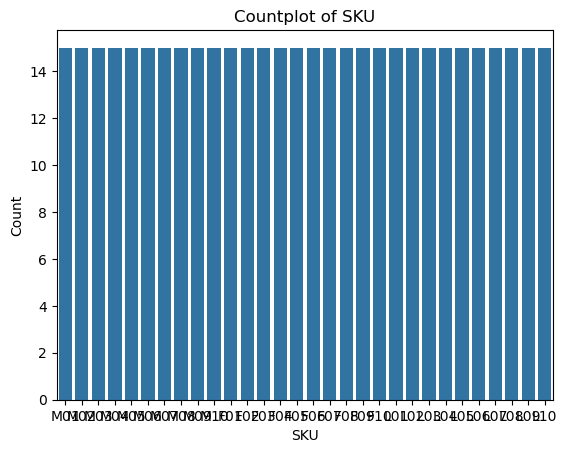

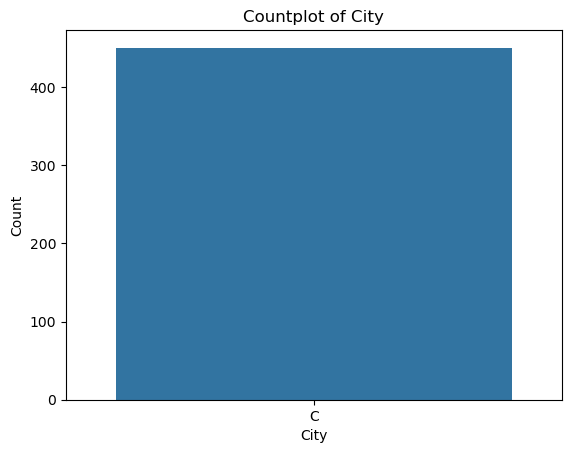

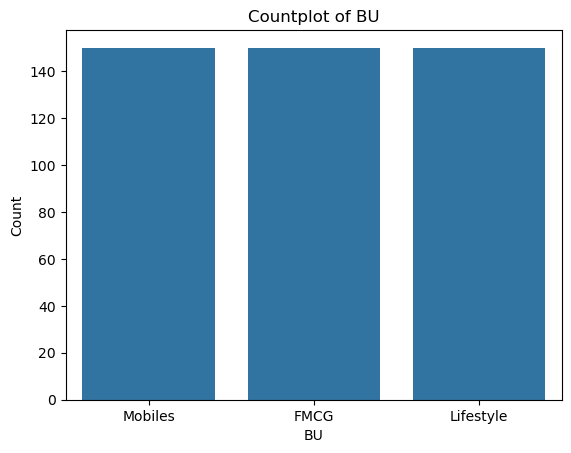

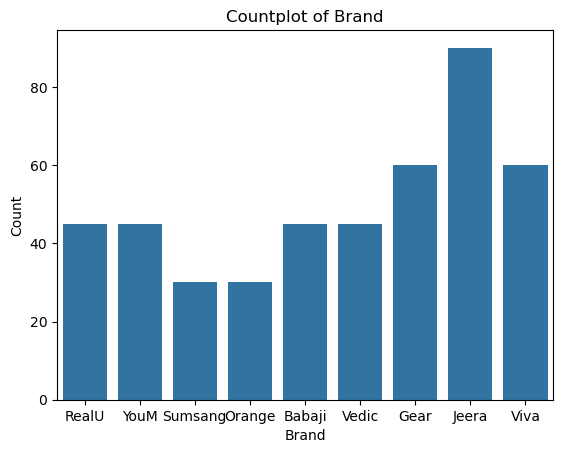

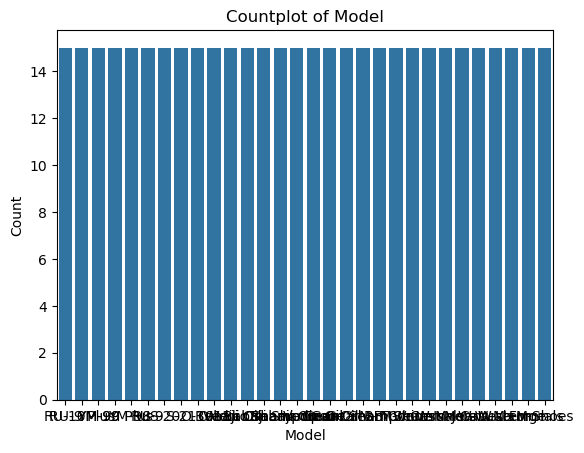

In [53]:
for col in cat:
    sns.countplot(x = df[col])
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### Conclusion

In [54]:
### 1. Descriptive statistics provide central tendency and spread for numerical columns.
### 2. Histograms reveal distribution shape.
### 3. Boxplots help detect outliers and visualize interquartile range.
### 4. Bar charts show frequency distribution of categorical variables.